In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline, RegularGridInterpolator, UnivariateSpline
from scipy.optimize import minimize_scalar
import random

sigma = 2
beta = 0.95
r = 0.03
def u(x,c,A_min):
    if x-c<A_min:
        return -1000
    else:
        return c**(1-sigma)/(1-sigma)

In [3]:
A_min = -1
y = np.array([0.5,1])
p_y=np.array([0.5,0.5])
x_points=np.linspace((1+r)*A_min+min(y),4,25)
c_points=np.linspace(0.1,2,25)
V = UnivariateSpline(x_points,np.zeros_like(x_points),s=0)


In [4]:
for i in range(200):
    V_points = np.zeros(len(x_points))
    for i,ix in enumerate(x_points):
        V_points[i]=-minimize_scalar(lambda c: -(u(ix,c,A_min)+beta*p_y@np.array([V((1+r)*(ix-c)+iy) for iy in y]).flatten()),
                                     method='bounded',bounds=[1e-4,ix-A_min-1e-4]).fun
    V = UnivariateSpline(x_points,V_points,s=0)
policy = np.zeros_like(x_points)
for i,ix in enumerate(x_points):
        policy[i]=minimize_scalar(lambda c: -(u(ix,c,A_min)+beta*p_y@np.array([V((1+r)*(ix-c)+iy) for iy in y]).flatten()),
                                     method='bounded',bounds=[1e-4,ix-A_min-1e-4]).x

C:\Users\MBBar\AppData\Local\Temp/ipykernel_30288/3056835322.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


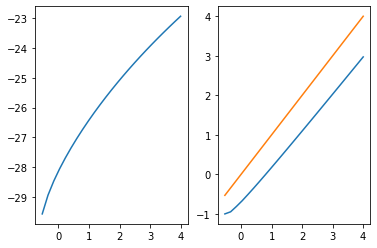

In [5]:
fig,ax=plt.subplots(ncols=2)
ax[0].plot(x_points,V_points)
ax[1].plot(x_points, x_points-policy)
ax[1].plot(x_points, x_points)
fig.show()

In [8]:
A_min = -1
y = np.array([0.5,1])
p_y=np.array([0.5,0.5])
x_points=np.linspace((1+r)*A_min+min(y),4,25)
c_points=np.linspace(0.1,2,25)
Q = RectBivariateSpline(x_points,c_points,-np.ones((len(x_points),len(c_points))))
Q = RegularGridInterpolator((x_points,c_points),-30*np.ones((len(x_points),len(c_points))),fill_value=-1000,bounds_error=False)

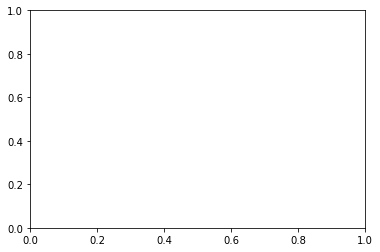

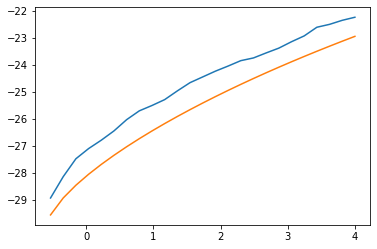

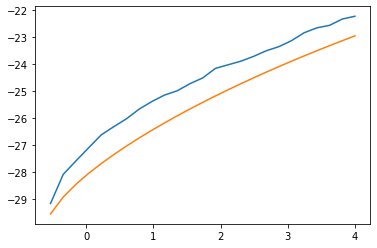

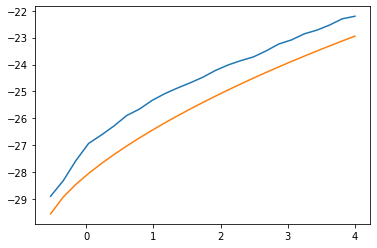

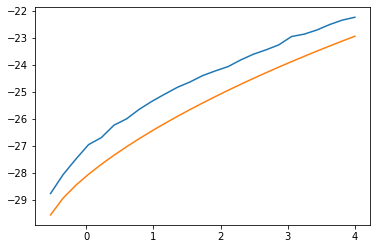

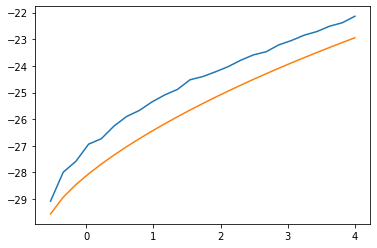

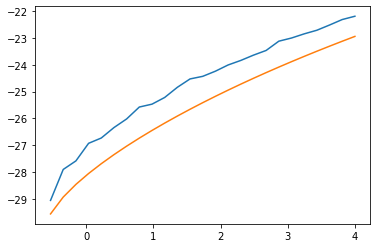

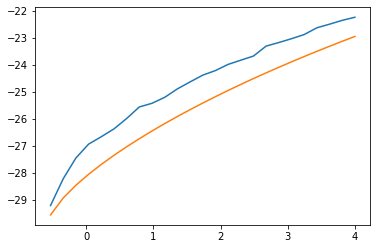

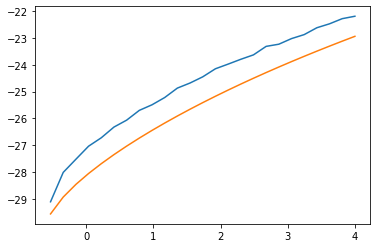

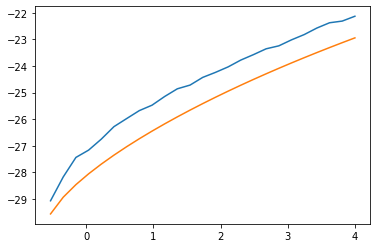

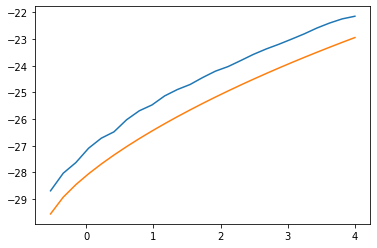

In [12]:
def Q_star(x,Q):
    '''
    Chooses best action in state x'''
    return max([Q((x,ic)) for ic in c_points])
    #return -minimize_scalar(lambda c: -Q((x,c))).fun


alpha=0.1
fig,ax=plt.subplots()
for it in range(100):
    Q_points = np.zeros((len(x_points),len(c_points)))
    for i,ix in enumerate(x_points):
        for j,jc in enumerate(c_points):
            ky = random.choices(y,p_y)
            Q_points[i,j]=(1-alpha)*Q((ix,jc))+\
                           alpha*(u(ix,jc,A_min)+beta*Q_star((1+r)*(ix-jc)+ky,Q))
            #if i==1:
                #print(ix,jc,u(ix,jc,A_min))
                #print(u(ix,jc,A_min)+beta*p_y@np.array([-minimize_scalar(lambda c: -Q(((R*(ix-jc))+iy,c))).fun for iy in y]).flatten())
    #Q = RectBivariateSpline(x_points,c_points,Q_points)
    Q = RegularGridInterpolator((x_points,c_points),Q_points,fill_value=-1000,bounds_error=False)
    if it%10==0:
        fig,ax=plt.subplots()
        ax.plot(x_points, np.max(Q_points,axis=1))
        ax.plot(x_points, V_points)
        plt.pause(0.01)

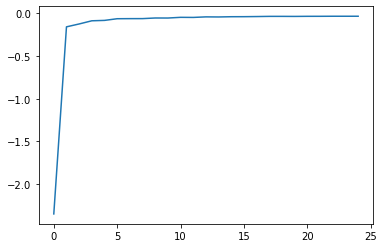

In [110]:
plt.plot(np.max(Q_points,axis=1))

In [77]:
-minimize_scalar(lambda c: -Q((x_points[0],c))).fun

-1.9499999999999997

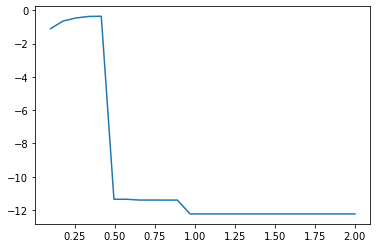

In [86]:
plt.plot(c_points, [Q((x_points[0],ic)) for ic in c_points])

C:\Users\MBBar\AppData\Local\Temp/ipykernel_10216/1523160448.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


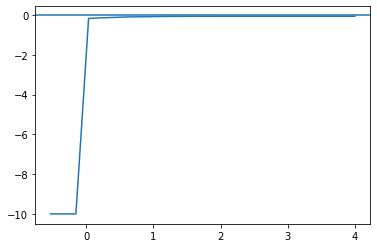

In [84]:
fig,ax=plt.subplots()
ax.plot(x_points,np.array([-minimize_scalar(lambda c: -Q((ix,c))).fun for ix in x_points]).flatten())
#ax.set(ylim=(-10,None))
ax.axhline(0)
fig.show()

C:\Users\MBBar\AppData\Local\Temp/ipykernel_10216/3494935169.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


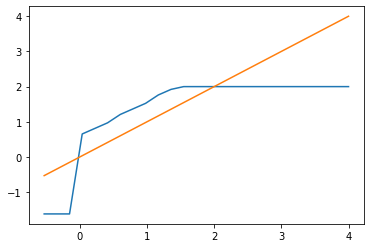

In [85]:
fig,ax=plt.subplots()
ax.plot(x_points,np.array([minimize_scalar(lambda c: -Q((ix,c))).x for ix in x_points]).flatten())
ax.plot(x_points,x_points)
fig.show()

$$Q(x,c)$$

$$Q^*(x,c)=u(x,c)+\beta\sum p_ij(x)\max_{c'}Q^*(x',c')$$
$$a'= Ra-c+y$$
$$x=Ra+y$$

array([[-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       [-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       [-100.        , -100.        , -100.        , ..., -100.        ,
        -100.        , -100.        ],
       ...,
       [  -1.        ,   -0.84482759,   -0.73134328, ...,   -0.10381356,
          -0.1018711 ,   -0.1       ],
       [  -1.        ,   -0.84482759,   -0.73134328, ...,   -0.10381356,
          -0.1018711 ,   -0.1       ],
       [  -1.        ,   -0.84482759,   -0.73134328, ...,   -0.10381356,
          -0.1018711 ,   -0.1       ]])

In [165]:
n_points = 50
a_points = np.linspace(0.1,5,n_points)
a_next_points = a_points.copy()
qtable = np.zeros((n_points,n_points))
_=np.array(list(itertools.product(a_points,a_next_points)))
a_grid, a_next_grid = _[:,0], _[:,1]

In [166]:
epsilon=0.5
alpha=0.5
y=1

In [181]:
def reward(a,a_next):
    c = R*a+y-a_next
    if c<0:
        return -100
    else:
        return u(c)

In [184]:
for _ in range(1000):
    for i,ia in enumerate(a_points):
        for j,ia_next in enumerate(a_next_points):
            if np.random.uniform()<epsilon:#exploit
                qtable[i,j] = reward(ia,ia_next)+beta*np.max(qtable[j,:])
            else: #explore
                rand_action = random.sample(range(n_points),1)
                qtable[i,j] = (1-alpha)*qtable[i,j]+alpha*max(reward(ia,ia_next)+beta*qtable[j,rand_action],qtable[i,j])

C:\Users\MBBar\AppData\Local\Temp/ipykernel_36056/3351183599.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


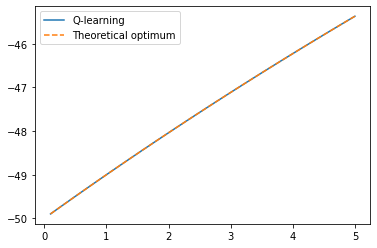

In [186]:
fig,ax=plt.subplots()
ax.plot(a_points, np.max(qtable,axis=1), label='Q-learning')
ax.plot(a_points, u((R-1)*a_points+y)/(1-beta), label='Theoretical optimum', ls='--')
ax.legend()
fig.show()

C:\Users\MBBar\AppData\Local\Temp/ipykernel_36056/1048531419.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


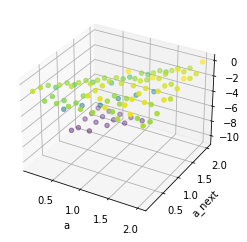

In [143]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(a_grid,a_next_grid,qtable.flatten(),c=qtable.flatten())
ax.set(xlabel='a', ylabel='a_next')
fig.show()